# BANK MARKETING

Importing all the required libries

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from scipy import stats
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from scipy.stats import skew,boxcox
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv('termdeposite_train.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


Downloding the dataset

## Exploring Data Variables

In [3]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [5]:
df.sample(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
15108,7893,40,blue-collar,married,primary,no,3693,yes,no,unknown,30,may,57,10,-1,0,unknown,no
27963,41191,51,blue-collar,married,secondary,no,1797,yes,no,cellular,20,aug,168,1,-1,0,unknown,no
1639,1356,33,entrepreneur,married,secondary,no,0,yes,yes,unknown,8,may,982,1,-1,0,unknown,no
31354,3204,47,services,married,secondary,no,543,yes,no,unknown,15,may,141,1,-1,0,unknown,no
30646,16391,32,management,single,secondary,no,131,yes,yes,cellular,23,jul,1152,2,-1,0,unknown,yes
5799,12068,39,blue-collar,married,secondary,no,-1002,yes,no,unknown,20,jun,9,5,-1,0,unknown,no
8682,18198,56,technician,divorced,unknown,no,1939,yes,no,cellular,30,jul,121,3,-1,0,unknown,no
20786,9559,37,self-employed,single,tertiary,no,1549,no,no,unknown,6,jun,48,2,-1,0,unknown,no
25846,4669,31,unemployed,married,primary,no,-63,yes,no,unknown,20,may,657,1,-1,0,unknown,no
18652,6564,44,blue-collar,single,secondary,no,-435,yes,no,unknown,27,may,141,2,-1,0,unknown,no


In [6]:
df.subscribed

0         no
1         no
2         no
3        yes
4         no
        ... 
31642     no
31643    yes
31644     no
31645     no
31646    yes
Name: subscribed, Length: 31647, dtype: object

In [7]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

We can observe that this dataset has 2 different types of data types object and int64. 

In [8]:
df.sample(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
22423,7470,48,blue-collar,married,unknown,no,2201,yes,no,unknown,29,may,364,2,-1,0,unknown,no
23288,12052,49,blue-collar,married,primary,no,4134,no,no,unknown,20,jun,40,2,-1,0,unknown,no
8222,2209,23,admin.,single,secondary,no,5,no,no,unknown,12,may,413,1,-1,0,unknown,no
28521,21298,52,management,married,tertiary,no,52,no,yes,cellular,18,aug,124,4,-1,0,unknown,no
20516,10197,32,management,single,tertiary,no,1160,yes,yes,unknown,11,jun,450,2,-1,0,unknown,no
18280,17203,35,self-employed,married,secondary,no,5613,yes,no,cellular,28,jul,699,3,-1,0,unknown,yes
7292,43171,60,housemaid,married,primary,no,211,no,no,cellular,26,feb,480,2,189,1,failure,no
547,27971,48,technician,married,secondary,no,547,no,no,cellular,28,jan,74,1,176,2,failure,no
1090,41096,42,admin.,married,primary,no,-306,yes,no,cellular,17,aug,308,1,459,1,success,yes
23340,38714,26,blue-collar,single,secondary,no,474,yes,no,cellular,15,may,504,2,-1,0,unknown,no


In [9]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [10]:
df.columns.tolist()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

In [11]:
df.isnull()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31643,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31644,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31645,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

We have no null values in this dataset

<AxesSubplot:>

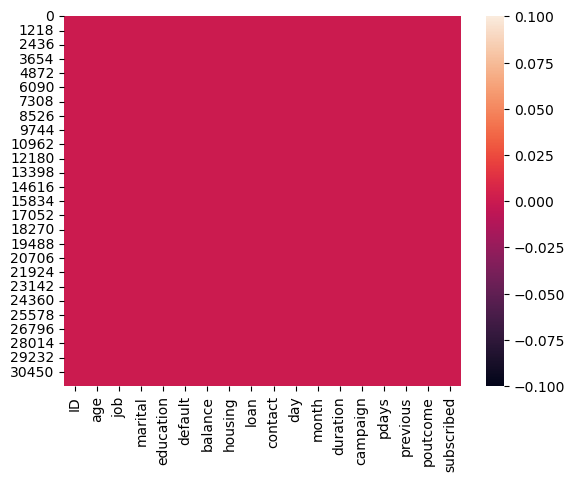

In [13]:
sns.heatmap(df.isnull())

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


Here we are checking the information of different columns

In [15]:
df.shape

(31647, 18)

Here we are checking for unique values in each column

In [16]:
df['age'].unique()

array([56, 31, 27, 57, 33, 50, 45, 35, 36, 44, 39, 43, 41, 53, 64, 48, 60,
       29, 30, 42, 46, 32, 63, 47, 49, 52, 68, 26, 58, 38, 54, 40, 59, 24,
       37, 34, 61, 55, 20, 69, 25, 62, 22, 51, 28, 70, 66, 23, 87, 71, 74,
       81, 73, 76, 72, 84, 19, 79, 75, 21, 83, 80, 67, 18, 77, 65, 82, 86,
       78, 88, 92, 95, 93, 89, 94, 90], dtype=int64)

In [17]:
df['age'].nunique()

76

In [18]:
df['job'].unique()

array(['admin.', 'unknown', 'services', 'management', 'technician',
       'retired', 'blue-collar', 'housemaid', 'self-employed', 'student',
       'entrepreneur', 'unemployed'], dtype=object)

In [19]:
df[df['job'] == 'unknown']

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
63,27845,39,unknown,single,unknown,no,0,no,no,telephone,28,jan,28,1,-1,0,unknown,no
95,9734,53,unknown,married,secondary,no,16,no,no,unknown,9,jun,100,1,-1,0,unknown,no
317,19070,59,unknown,married,unknown,no,1541,no,no,cellular,5,aug,790,1,-1,0,unknown,no
349,21654,40,unknown,married,tertiary,no,119,no,no,cellular,19,aug,258,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30596,9059,51,unknown,single,unknown,no,0,no,no,unknown,5,jun,409,1,-1,0,unknown,no
30636,11356,46,unknown,married,primary,no,110,no,no,unknown,19,jun,113,14,-1,0,unknown,no
30645,355,59,unknown,divorced,unknown,no,27,no,no,unknown,5,may,347,3,-1,0,unknown,no
31475,41872,33,unknown,single,secondary,no,9,no,no,cellular,19,oct,238,1,-1,0,unknown,no


In [20]:
df_filtered1=df.drop(df[df['job']=='unknown'].index)

In [21]:
df_filtered1.shape

(31441, 18)

In [22]:
df['job'].nunique()

12

The job column had 206 rows containing unknown values so i dropped those rows

In [23]:
df['marital'].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [24]:
df['marital'].nunique()

3

In [25]:
df['education'].unique()

array(['unknown', 'secondary', 'tertiary', 'primary'], dtype=object)

In [26]:
df['education'].nunique()

4

In [27]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [28]:
df['default'].nunique()

2

In [29]:
df['balance'].unique()

array([1933,    3,  891, ..., 2787, 8741, 2968], dtype=int64)

In [30]:
df['balance'].nunique()

6326

In [31]:
df['housing'].unique()

array(['no', 'yes'], dtype=object)

In [32]:
df['housing'].nunique()

2

In [33]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [34]:
df['loan'].nunique()

2

In [35]:
df['contact'].unique()

array(['telephone', 'cellular', 'unknown'], dtype=object)

In [36]:
df['contact'].nunique()

3

In [37]:
df['day'].unique()

array([19, 20, 18, 22,  4,  2,  3,  8, 15,  5, 28,  6, 14,  7, 24, 13,  9,
       11, 21, 12, 30, 27, 17, 16, 25, 10,  1, 29, 26, 31, 23],
      dtype=int64)

In [38]:
df['day'].nunique()

31

In [39]:
df['month'].unique()

array(['nov', 'jul', 'jun', 'feb', 'sep', 'jan', 'may', 'aug', 'apr',
       'oct', 'mar', 'dec'], dtype=object)

In [40]:
df['month'].nunique()

12

In [41]:
df['campaign'].unique()

array([ 2,  1,  3,  4,  7,  5, 33, 12,  8,  9,  6, 24, 17, 11, 20, 25, 19,
       29, 21, 10, 27, 38, 16, 18, 14, 30, 13, 15, 63, 23, 31, 43, 35, 22,
       34, 28, 26, 41, 37, 50, 55, 32, 44, 36, 39], dtype=int64)

In [42]:
df['campaign'].nunique()

45

In [43]:
df['pdays'].unique()

array([ -1,  84, 251,   9, 456, 120,  92, 347, 154, 291, 344, 196, 324,
       332, 304, 297, 149, 102, 330, 301, 182,  26, 112, 457, 104, 256,
        90,  94, 135, 113, 360, 224,  98, 153,  82,  18, 343, 337, 365,
        93, 174,  96, 193,  83,  87, 272, 261,  91, 156, 195, 181, 151,
       336, 323, 342,  99, 187, 141, 329, 253, 352, 172, 177, 771, 555,
       119, 190, 362, 189, 351, 254, 169, 357, 111, 317, 367, 160, 116,
       356,  77, 225, 206, 331, 100, 136, 346, 260, 484, 176,  95, 230,
       366, 319, 521, 152, 179, 215, 430, 287, 842, 349, 180, 259, 283,
       275, 348, 140, 202, 370,  89, 184, 213, 308, 255, 188,  86, 161,
       252, 129, 271, 334, 279, 358, 103,   6, 110, 316, 270, 363, 374,
       197, 106, 198, 322, 131, 338, 235, 146, 295,  35, 459, 274, 273,
         4, 105, 143, 326, 183, 229, 369, 241, 280, 318, 173, 132, 201,
       368, 266, 340,  97, 364, 167,   5, 288, 276, 335, 493,  50, 134,
       145,  21, 147, 312, 269, 148, 305, 265,   2, 792, 246, 37

In [44]:
df['pdays'].nunique()

509

In [45]:
df['previous'].unique()

array([  0,   3,   2,   4,   1,   5,   9,   6,   8,  11,  16,  10,  14,
         7,  12,  23,  13,  18,  30,  27, 275,  20,  15,  17,  19,  22,
        25,  26,  28,  29,  32,  21,  24,  38,  58,  35,  41,  37],
      dtype=int64)

In [46]:
df['previous'].nunique()

38

In [47]:
df['poutcome'].unique()

array(['unknown', 'success', 'failure', 'other'], dtype=object)

In [48]:
df['poutcome'].nunique()

4

In [49]:
df['subscribed'].unique()

array(['no', 'yes'], dtype=object)

In [50]:
df['subscribed'].nunique()

2

In [51]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

In [52]:
df.nunique().to_frame('No of unique values')

,No of unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


In [53]:
df.shape

(31647, 18)

In [54]:
df.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

## Data Visualization

### Univariate Analysis

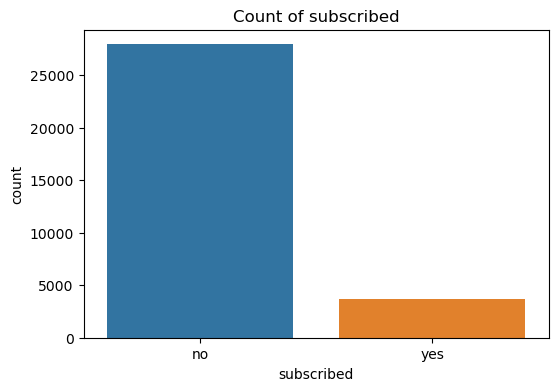

In [55]:
plt.figure(figsize=(6,4))
plt.title('Count of subscribed')
plt.xlabel('subscribed')
plt.ylabel('Count')
sns.countplot(x='subscribed', data=df)
plt.show()

In this target data we have more customers who didnot subscribe and very feew customers subscribed

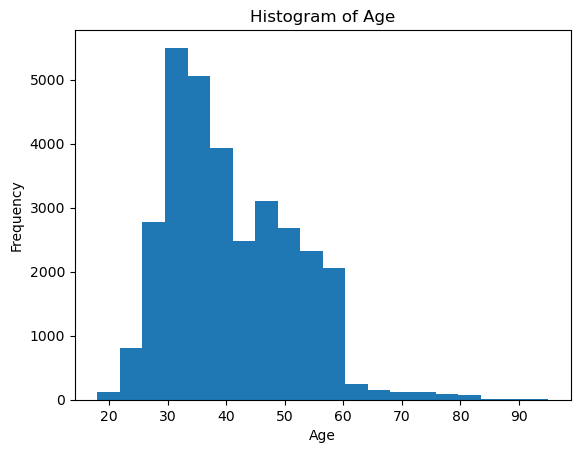

In [56]:
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

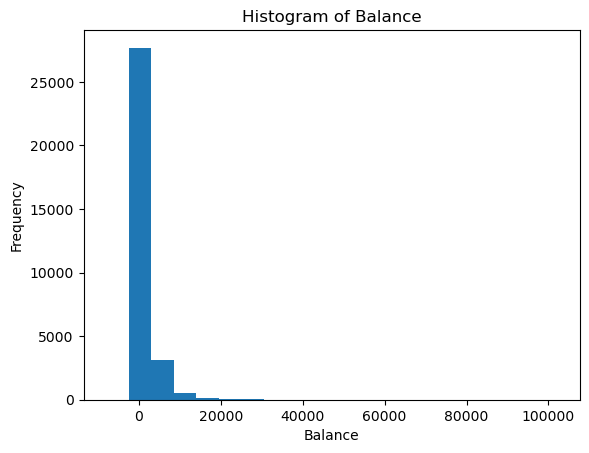

In [57]:
plt.hist(df['balance'], bins=20)
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Balance')
plt.show()

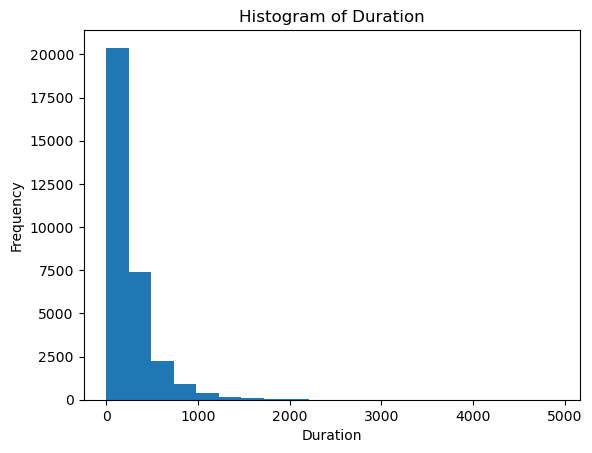

In [58]:
plt.hist(df['duration'], bins=20)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Duration')
plt.show()

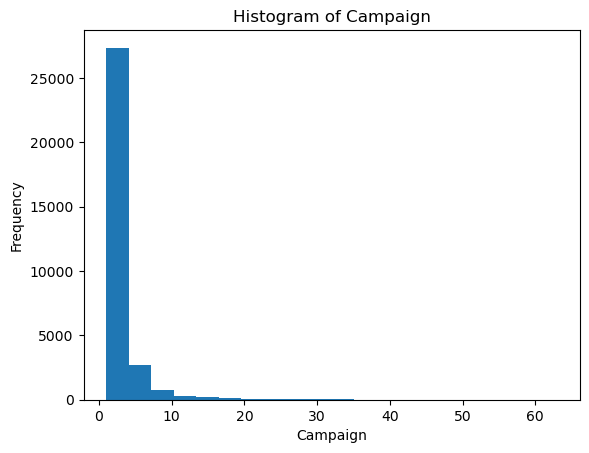

In [59]:
plt.hist(df['campaign'], bins=20)
plt.xlabel('Campaign')
plt.ylabel('Frequency')
plt.title('Histogram of Campaign')
plt.show()

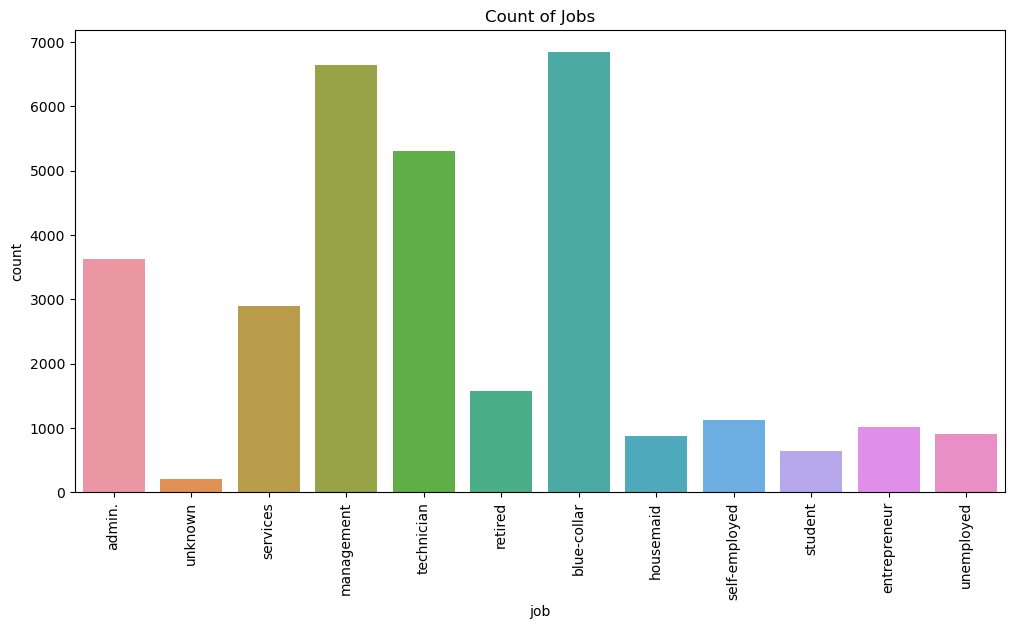

In [60]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Count of Jobs')
plt.xlabel('Job')
plt.ylabel('Count')
sns.countplot(x='job', data=df)
plt.show()

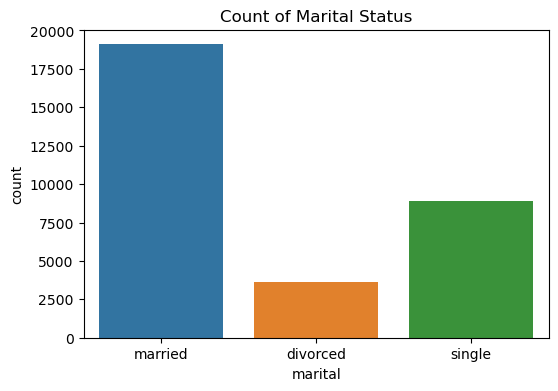

In [61]:
plt.figure(figsize=(6,4))
plt.title('Count of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
sns.countplot(x='marital', data=df)
plt.show()

There are more no of married people present in this dataset followed by single and divorced marital

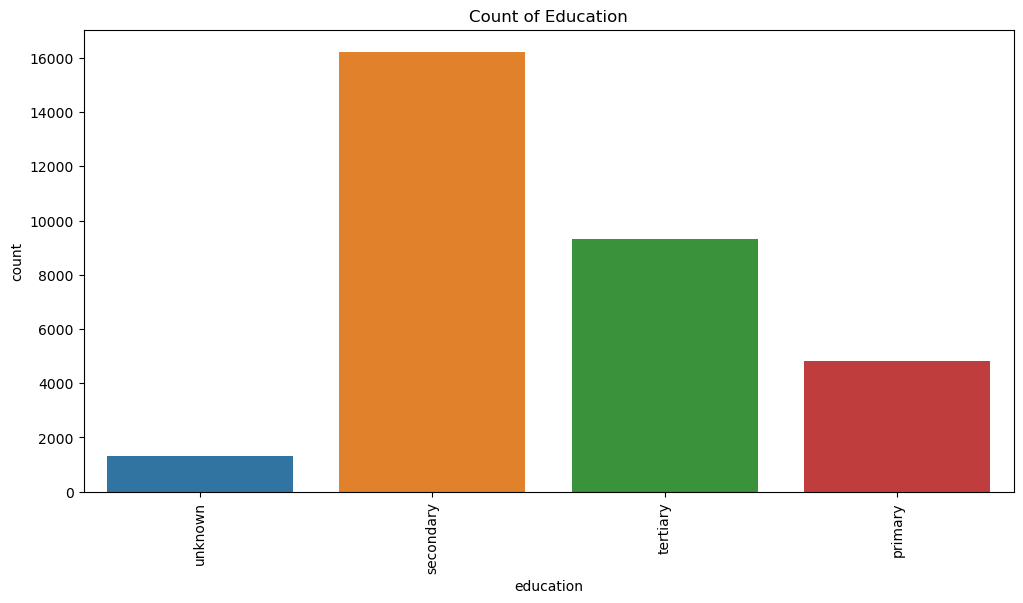

In [225]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Count of Education')
plt.xlabel('Education')
plt.ylabel('Count')
sns.countplot(x='education', data=df)
plt.show()

Most of the people here have done with their secondary education follwed by tertiary and primary

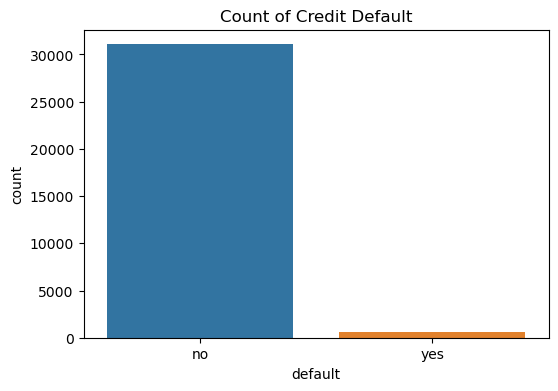

In [63]:
plt.figure(figsize=(6,4))
plt.title('Count of Credit Default')
plt.xlabel('Credit Default')
plt.ylabel('Count')
sns.countplot(x='default', data=df)
plt.show()

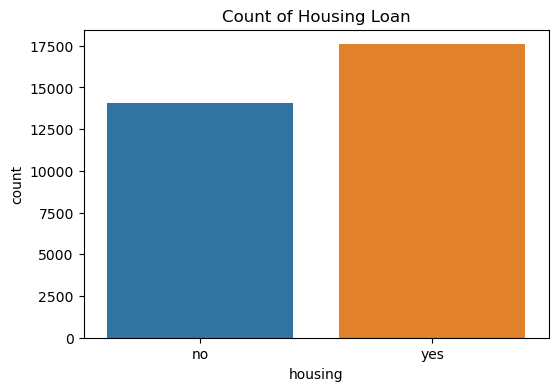

In [64]:
plt.figure(figsize=(6,4))
plt.title('Count of Housing Loan')
plt.xlabel('Housing Loan')
plt.ylabel('Count')
sns.countplot(x='housing', data=df)
plt.show()

The difference between people with housing loan and no houseing load is very less

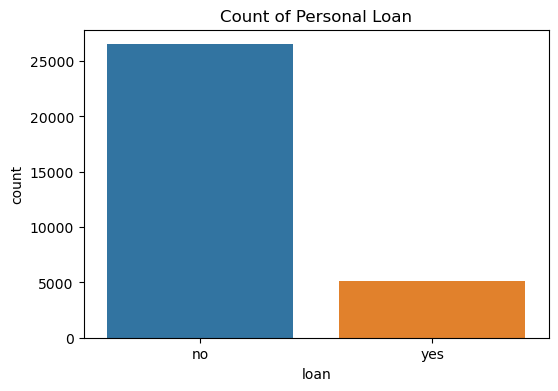

In [65]:
plt.figure(figsize=(6,4))
plt.title('Count of Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
sns.countplot(x='loan', data=df)
plt.show()

Number of People with no personal loan is very high as compared to yes personal loan

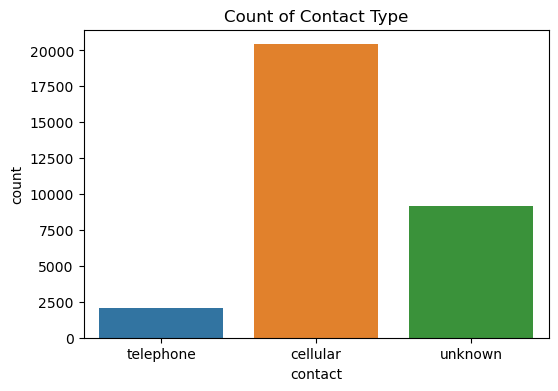

In [66]:
plt.figure(figsize=(6,4))
plt.title('Count of Contact Type')
plt.xlabel('Contact Type')
plt.ylabel('Count')
sns.countplot(x='contact', data=df)
plt.show()

Number of people with cellular contact is higher than people with telephone

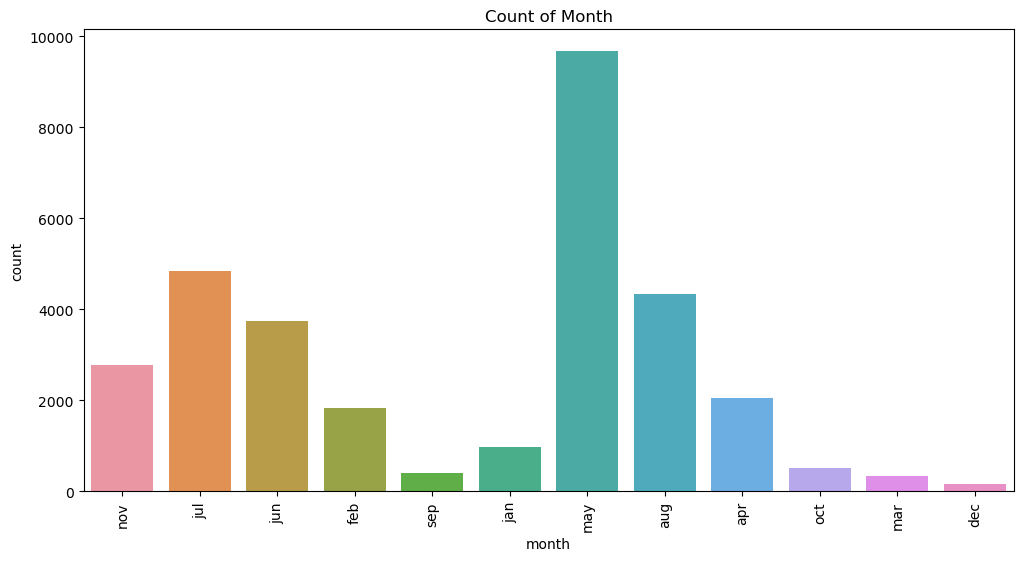

In [67]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Count of Month')
plt.xlabel('Month')
plt.ylabel('Count')
sns.countplot(x='month', data=df)
plt.show()

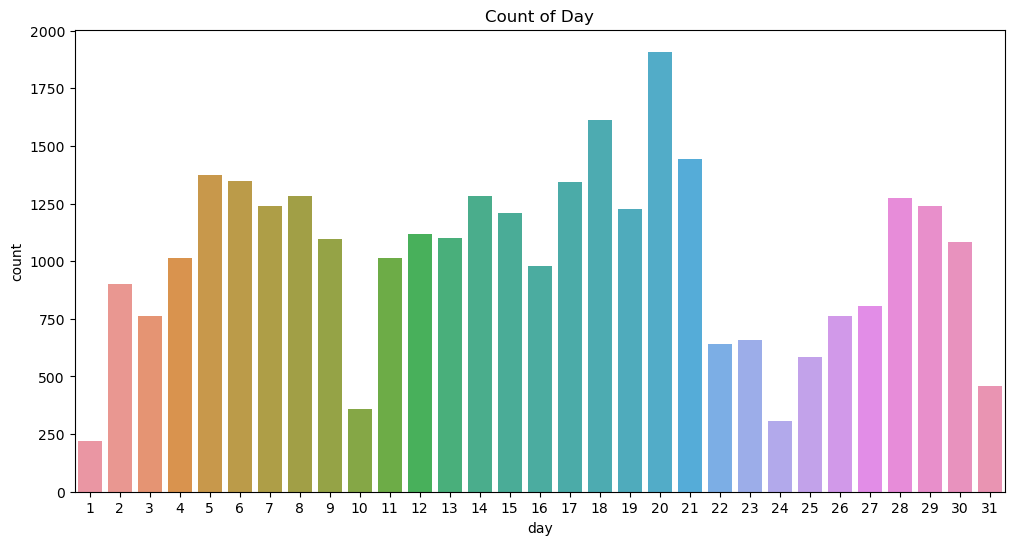

In [68]:
plt.figure(figsize=(12,6))
plt.title('Count of Day')
plt.xlabel('Day')
plt.ylabel('Count')
sns.countplot(x='day', data=df)
plt.show()

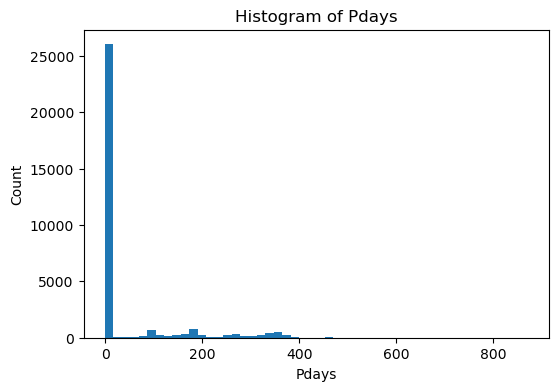

In [69]:
plt.figure(figsize=(6,4))
plt.title('Histogram of Pdays')
plt.xlabel('Pdays')
plt.ylabel('Count')
plt.hist(df['pdays'], bins=50)
plt.show()

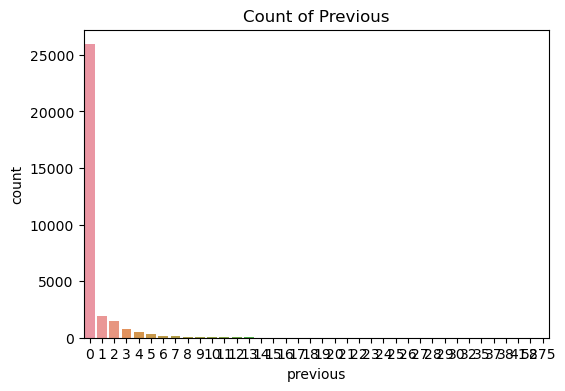

In [70]:
plt.figure(figsize=(6,4))
plt.title('Count of Previous')
plt.xlabel('Previous')
plt.ylabel('Count')
sns.countplot(x='previous', data=df)
plt.show()

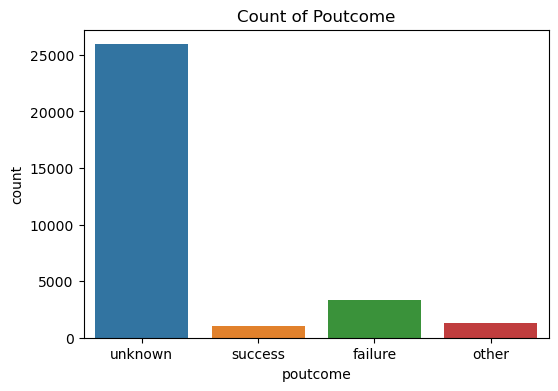

In [71]:
plt.figure(figsize=(6,4))
plt.title('Count of Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Count')
sns.countplot(x='poutcome', data=df)
plt.show()

## Bivariate Analysis

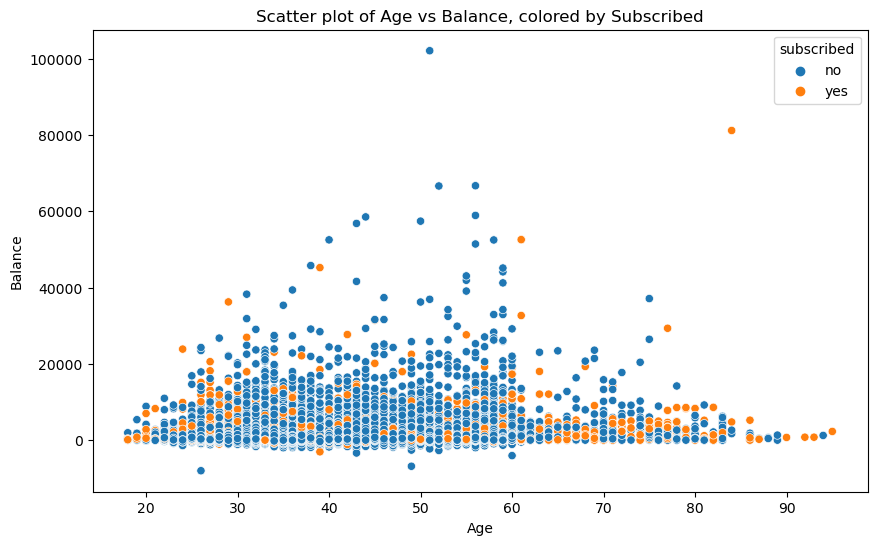

In [72]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='balance', hue='subscribed', data=df)
plt.title('Scatter plot of Age vs Balance, colored by Subscribed')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

People in the age range of 40 to 50 has more balance than any other age group

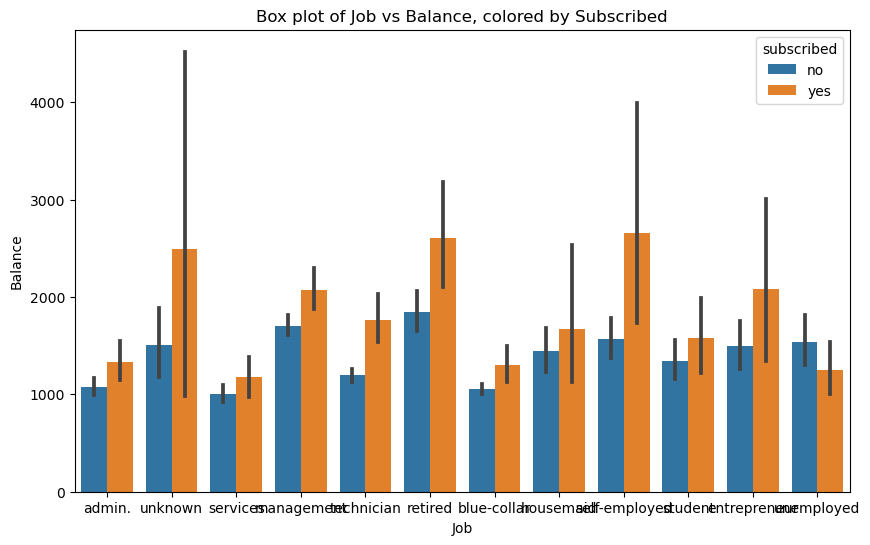

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(x='job', y='balance', hue='subscribed', data=df)
plt.title('Box plot of Job vs Balance, colored by Subscribed')
plt.xlabel('Job')
plt.ylabel('Balance')
plt.show()

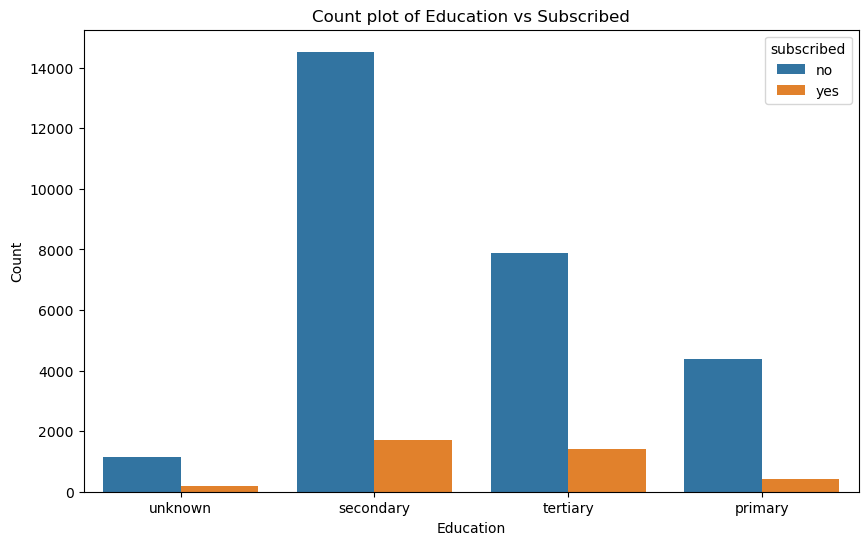

In [74]:
plt.figure(figsize=(10,6))
sns.countplot(x='education', hue='subscribed', data=df)
plt.title('Count plot of Education vs Subscribed')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

People with secondary education has not subscribed much

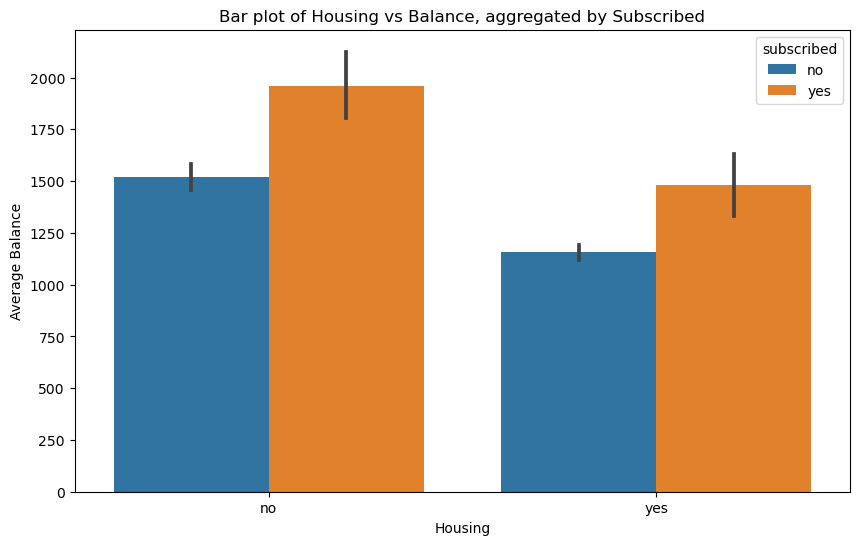

In [75]:
plt.figure(figsize=(10,6))
sns.barplot(x='housing', y='balance', hue='subscribed', data=df, estimator=np.mean)
plt.title('Bar plot of Housing vs Balance, aggregated by Subscribed')
plt.xlabel('Housing')
plt.ylabel('Average Balance')
plt.show()

People with housing has less balance as compared to people with no housing and the subscription rate is also higher with no housing

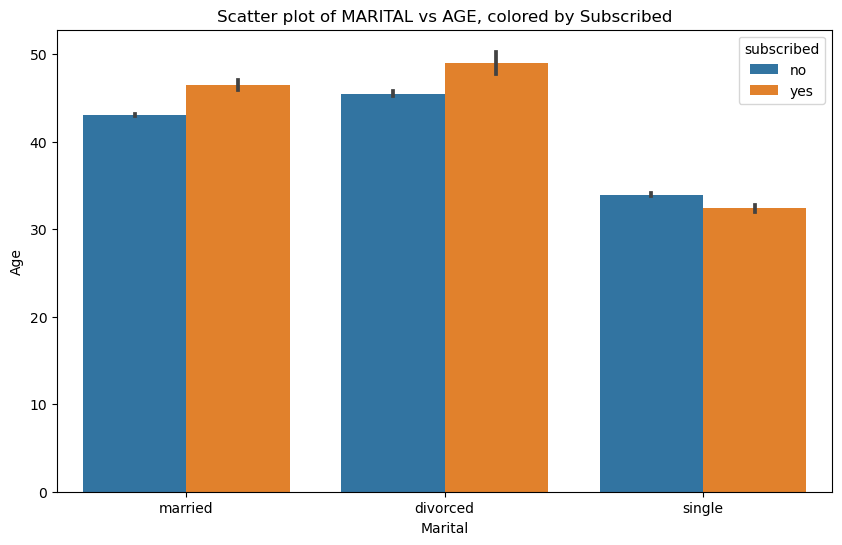

In [76]:
plt.figure(figsize=(10,6))
sns.barplot(x='marital', y='age', hue='subscribed', data=df)
plt.title('Scatter plot of MARITAL vs AGE, colored by Subscribed')
plt.xlabel('Marital')
plt.ylabel('Age')
plt.show()

the subscription rate(yes and no) among married and divorced people is almost equal where preety less among single people

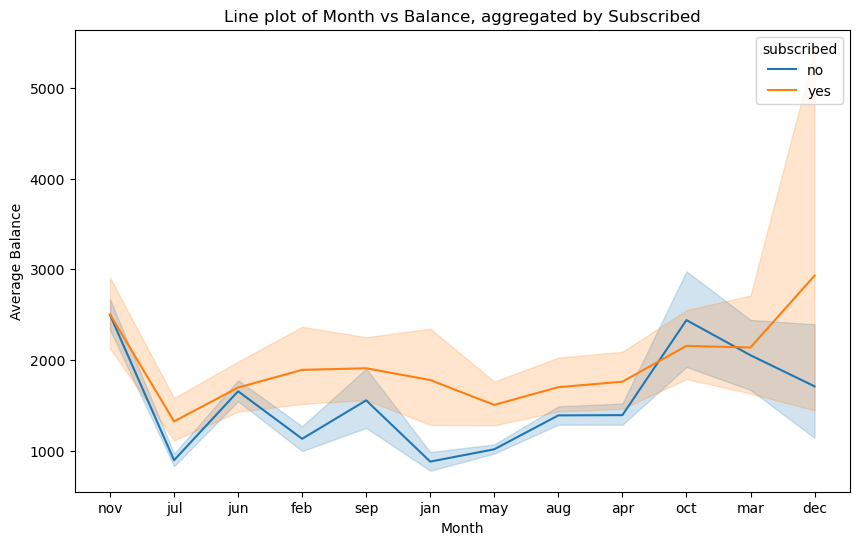

In [77]:
plt.figure(figsize=(10,6))
sns.lineplot(x='month', y='balance', hue='subscribed', data=df, estimator=np.mean)
plt.title('Line plot of Month vs Balance, aggregated by Subscribed')
plt.xlabel('Month')
plt.ylabel('Average Balance')
plt.show()

Prople who has more balance through out the year has subscribed

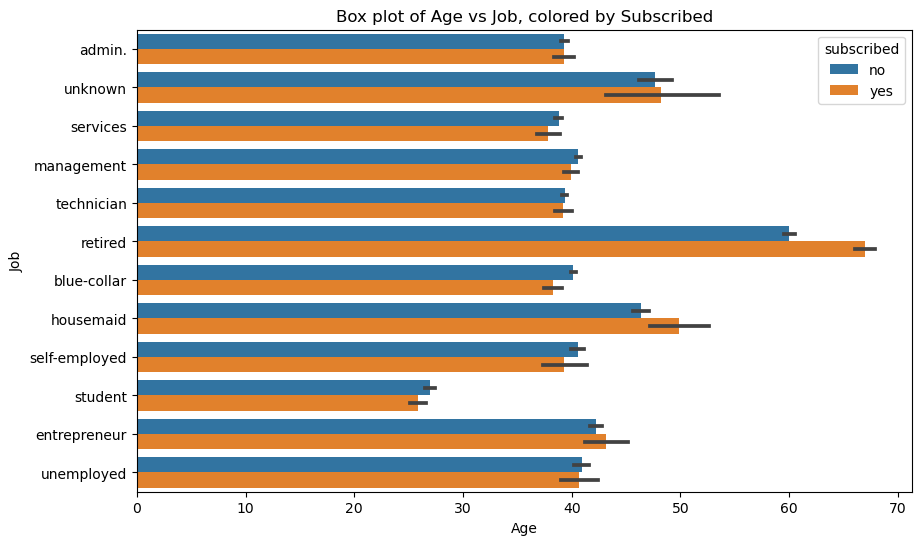

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(x='age', y='job', hue='subscribed', data=df)
plt.title('Box plot of Age vs Job, colored by Subscribed')
plt.xlabel('Age')
plt.ylabel('Job')
plt.show()

Number of retired person who has subscribed is more  

### Multivariate Analysis

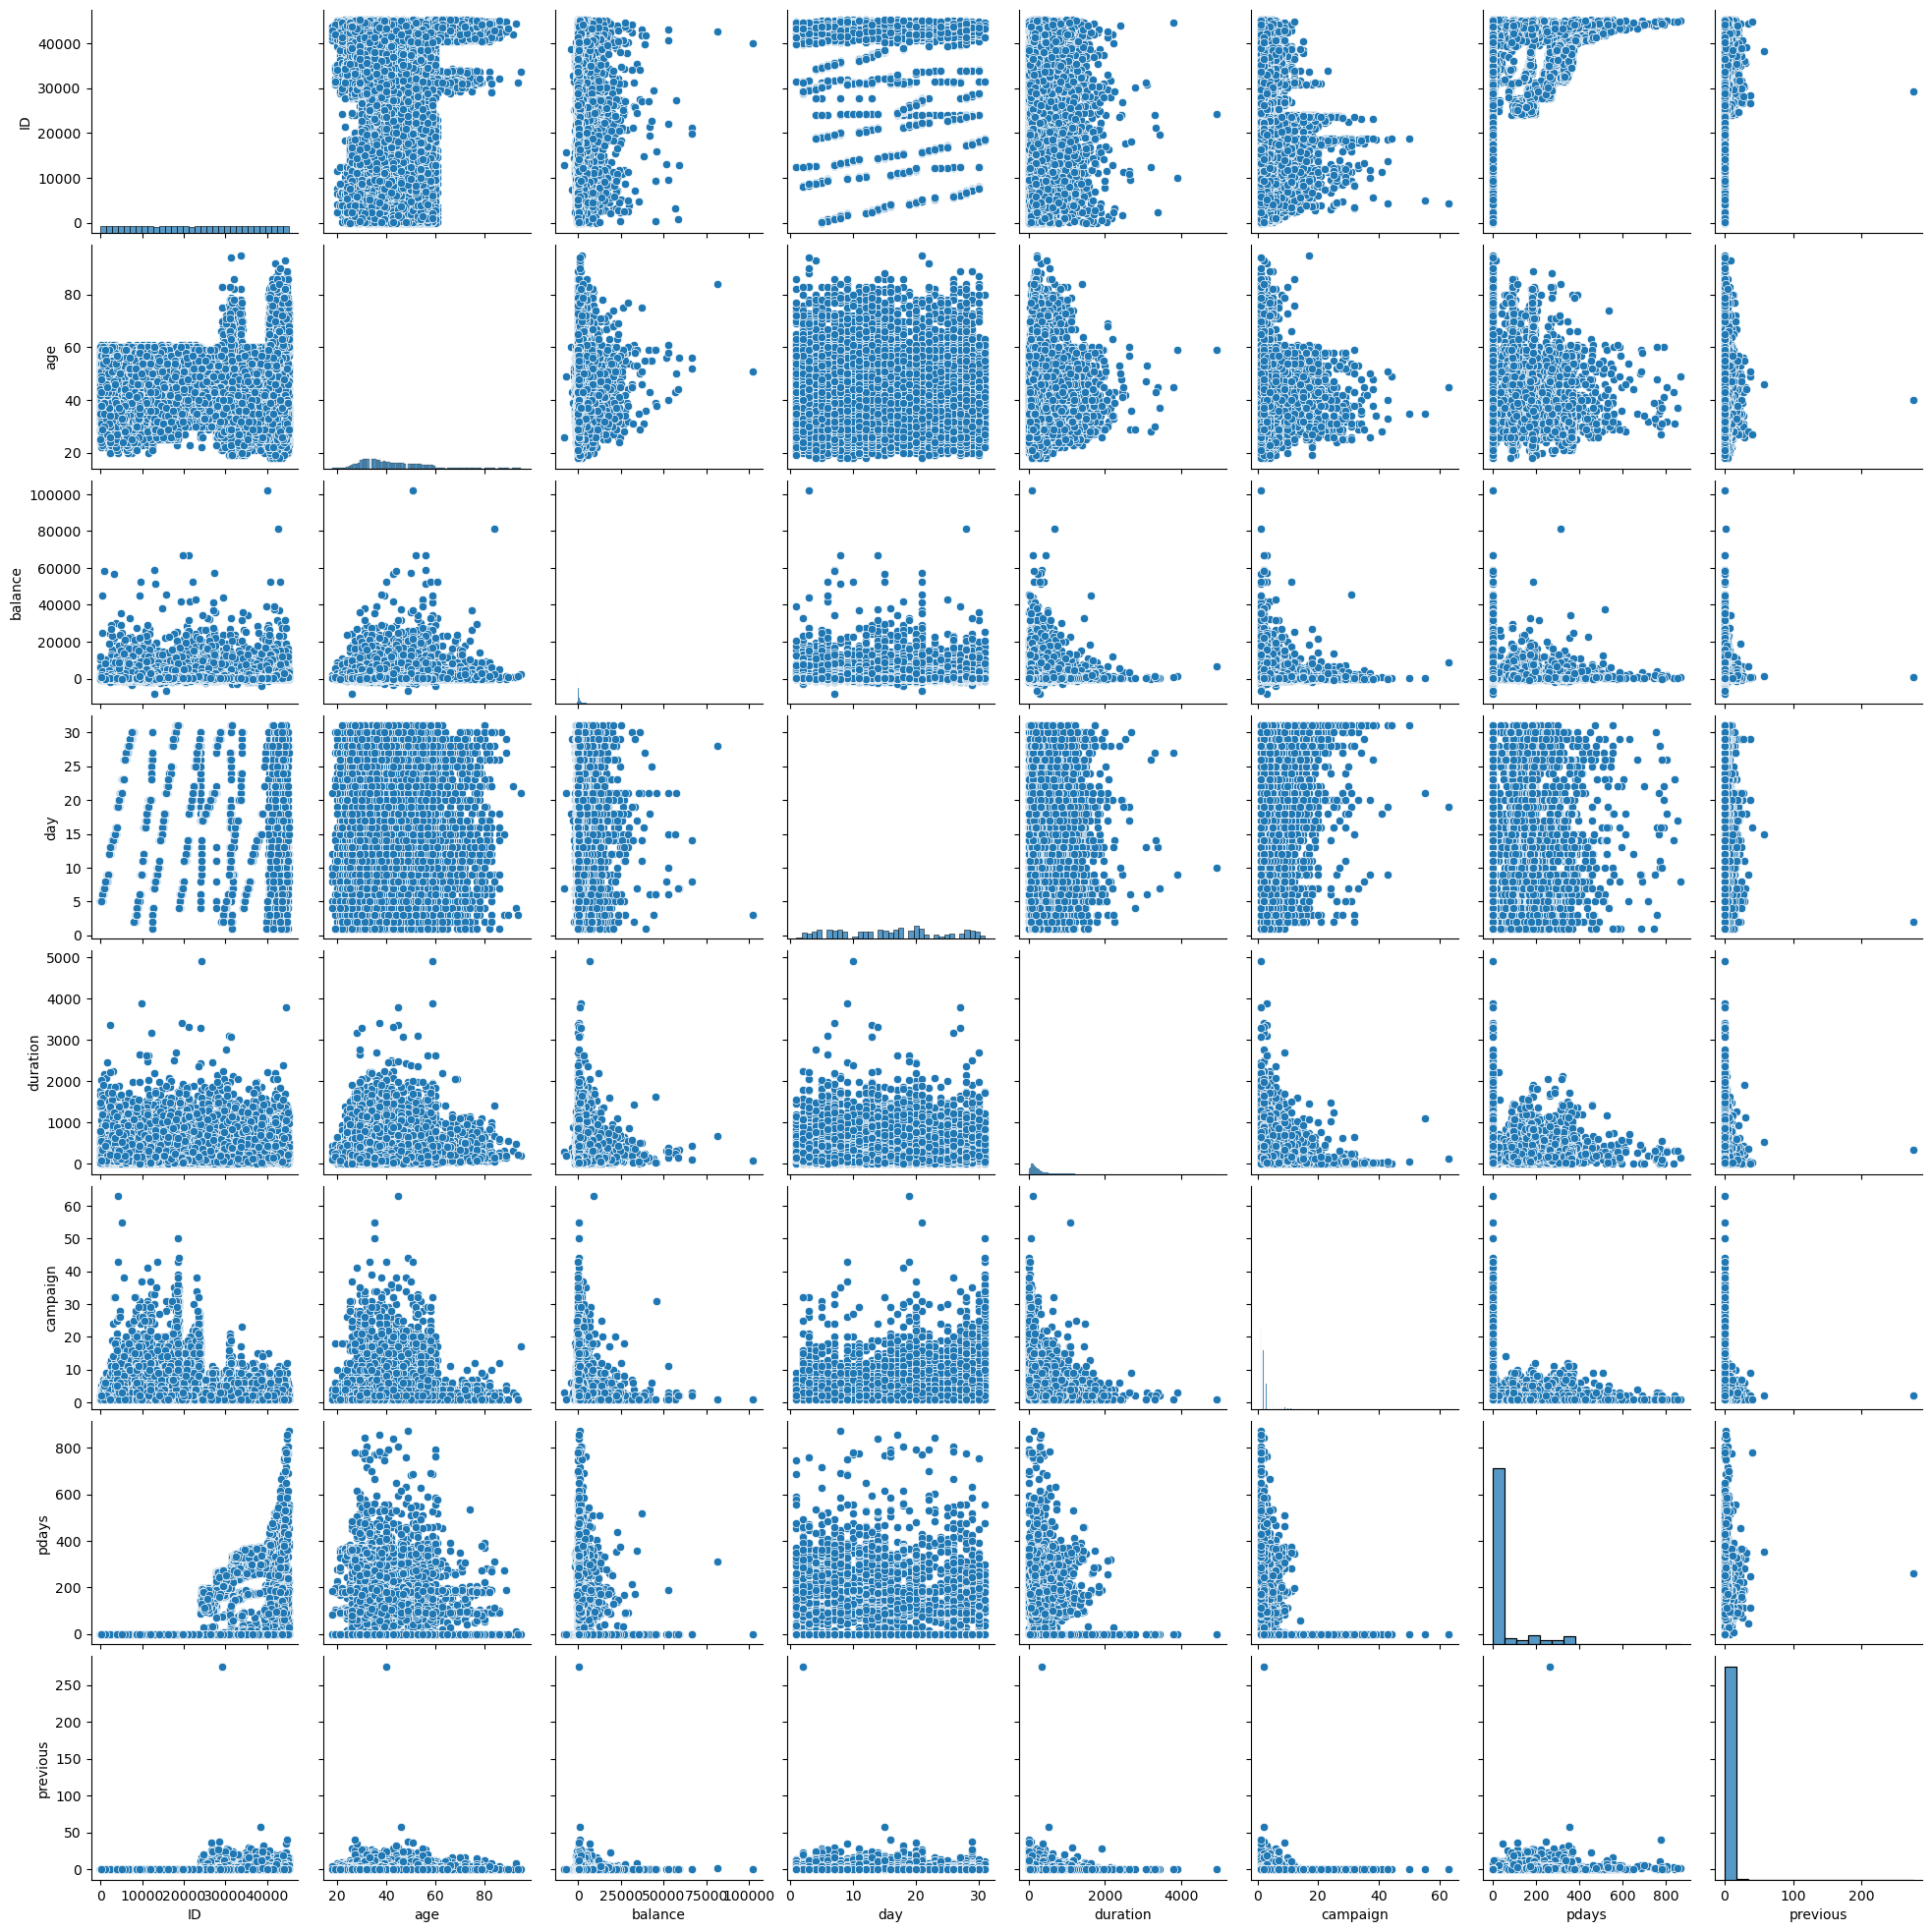

In [80]:
sns.pairplot(df)

In [81]:
corr=df.corr()
corr

,ID,age,balance,day,duration,campaign,pdays,previous
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000


<AxesSubplot:>

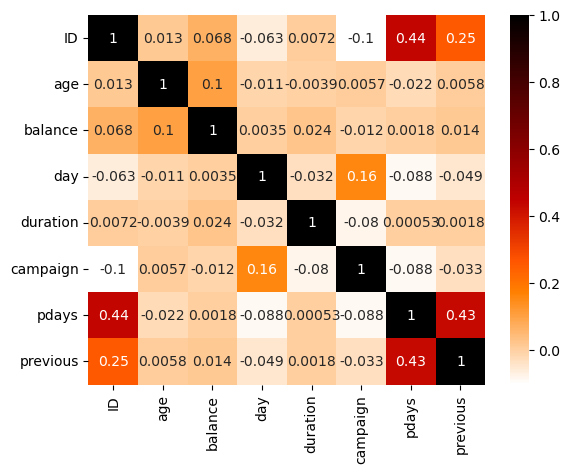

In [82]:
sns.heatmap(corr,cmap='gist_heat_r',annot=True)

Key Observation

day is negetively correlated with pdays

previous is moderatetly correlated with pdays

### Separating Numerical and Categorical Columns

In [83]:
# Numerical columns
num_cols = df.select_dtypes(include=['int64']).columns
num_df = df[num_cols]

# Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
cat_df = df[cat_cols]

In [84]:
num_df

,ID,age,balance,day,duration,campaign,pdays,previous
0,26110,56,1933,19,44,2,-1,0
1,40576,31,3,20,91,2,-1,0
2,15320,27,891,18,240,1,-1,0
3,43962,57,3287,22,867,1,84,3
4,29842,31,119,4,380,1,-1,0
...,...,...,...,...,...,...,...,...
31642,36483,29,0,12,116,2,-1,0
31643,40178,53,380,5,438,2,-1,0
31644,19710,32,312,7,37,3,-1,0
31645,38556,57,225,15,22,7,337,12


In [85]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')

In [86]:
cat_df

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
0,admin.,married,unknown,no,no,no,telephone,nov,unknown,no
1,unknown,married,secondary,no,no,no,cellular,jul,unknown,no
2,services,married,secondary,no,yes,no,cellular,jul,unknown,no
3,management,divorced,tertiary,no,no,no,cellular,jun,success,yes
4,technician,married,secondary,no,yes,no,cellular,feb,unknown,no
...,...,...,...,...,...,...,...,...,...,...
31642,management,single,tertiary,no,yes,no,cellular,may,unknown,no
31643,management,divorced,tertiary,no,no,yes,cellular,jun,unknown,yes
31644,management,single,tertiary,no,no,no,cellular,aug,unknown,no
31645,technician,married,secondary,no,yes,no,telephone,may,failure,no


### Description of Dataset

In [87]:
num_df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Key Observation

The mean value in age, balance, day, duration, pdays is lower than the 50 percentile showing the skewness in the data.

The difference between 75% and maximun value in age, balance, duration, campaign and padys are very high indicating the presence of outliers.

The standard deviation in Balance, day, duration and padys column is very high indicating the data is widely spread.


### Plotting Outliers

ID             AxesSubplot(0.125,0.53;0.168478x0.35)
age         AxesSubplot(0.327174,0.53;0.168478x0.35)
balance     AxesSubplot(0.529348,0.53;0.168478x0.35)
day         AxesSubplot(0.731522,0.53;0.168478x0.35)
duration       AxesSubplot(0.125,0.11;0.168478x0.35)
campaign    AxesSubplot(0.327174,0.11;0.168478x0.35)
pdays       AxesSubplot(0.529348,0.11;0.168478x0.35)
previous    AxesSubplot(0.731522,0.11;0.168478x0.35)
dtype: object

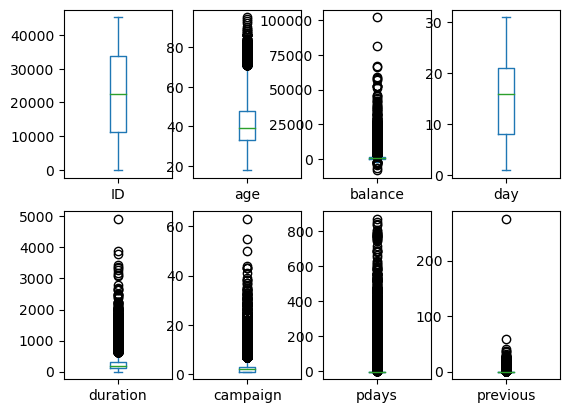

In [88]:
num_df.plot(kind='box',subplots=True,layout=(2,4))

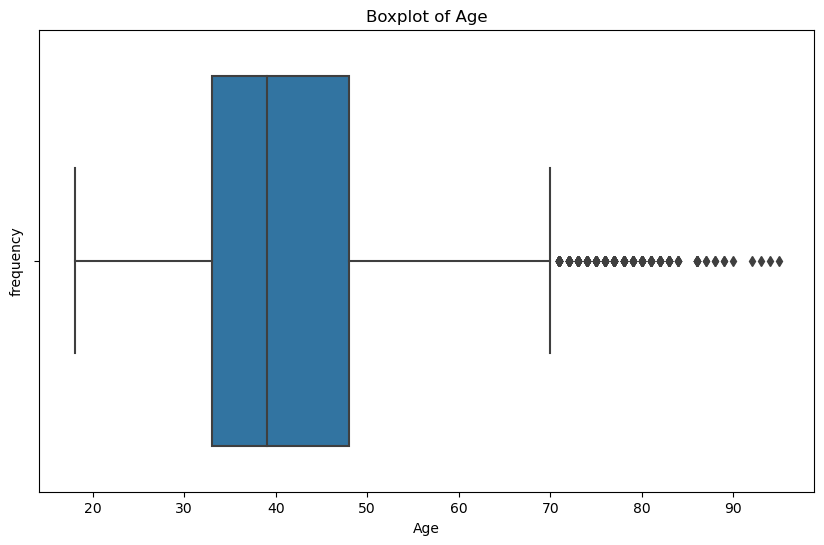

In [89]:
plt.figure(figsize=(10,6))
sns.boxplot(x='age',data=num_df)
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

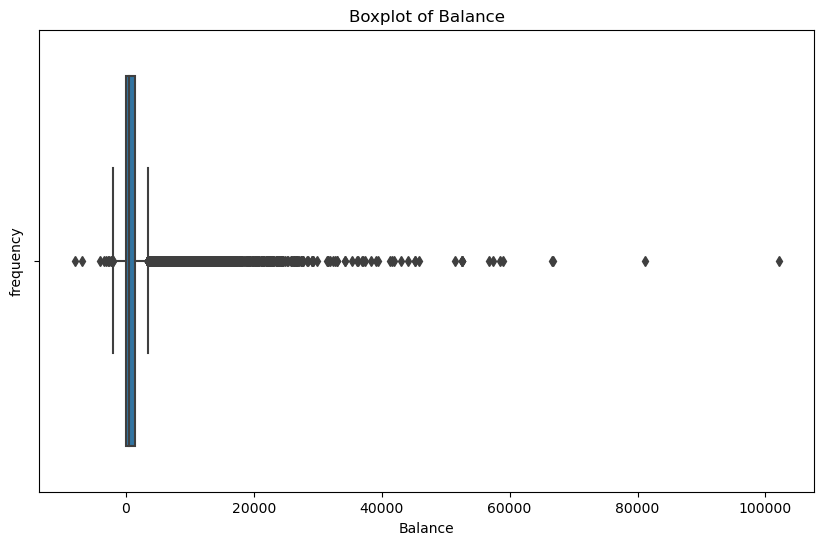

In [90]:
plt.figure(figsize=(10,6))
sns.boxplot(x='balance',data=num_df)
plt.title('Boxplot of Balance')
plt.xlabel('Balance')
plt.ylabel('frequency')
plt.show()

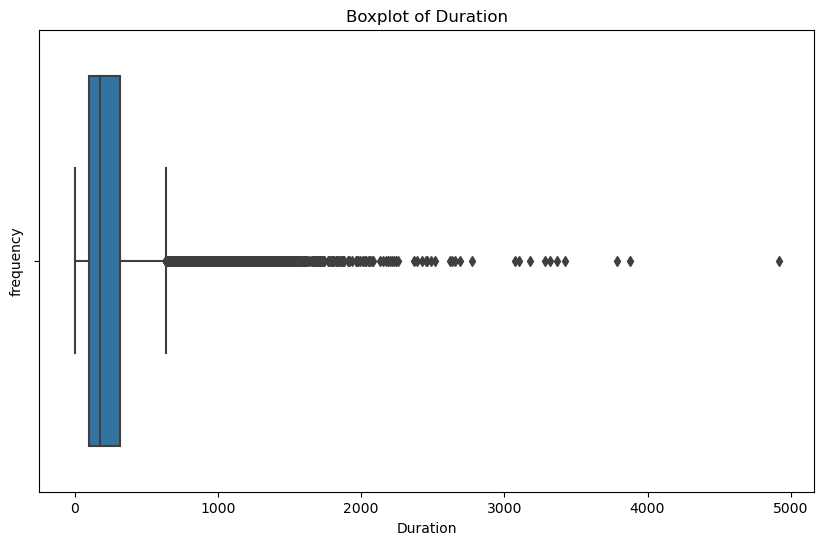

In [91]:
plt.figure(figsize=(10,6))
sns.boxplot(x='duration',data=num_df)
plt.title('Boxplot of Duration')
plt.xlabel('Duration')
plt.ylabel('frequency')
plt.show()

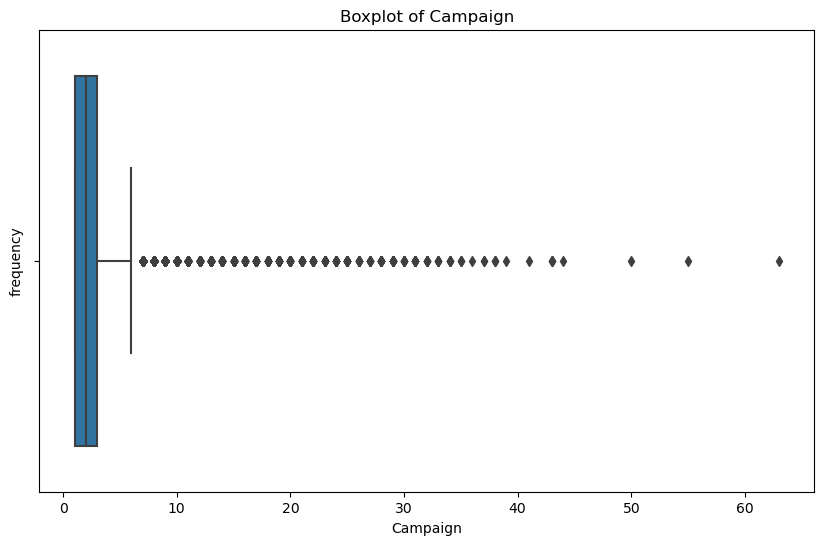

In [92]:
plt.figure(figsize=(10,6))
sns.boxplot(x='campaign',data=num_df)
plt.title('Boxplot of Campaign')
plt.xlabel('Campaign')
plt.ylabel('frequency')
plt.show()

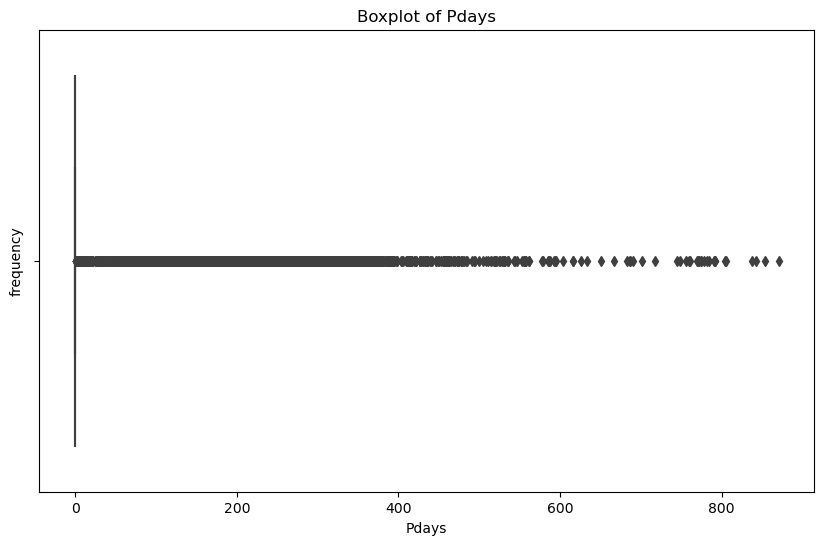

In [93]:
plt.figure(figsize=(10,6))
sns.boxplot(x='pdays',data=num_df)
plt.title('Boxplot of Pdays')
plt.xlabel('Pdays')
plt.ylabel('frequency')
plt.show()

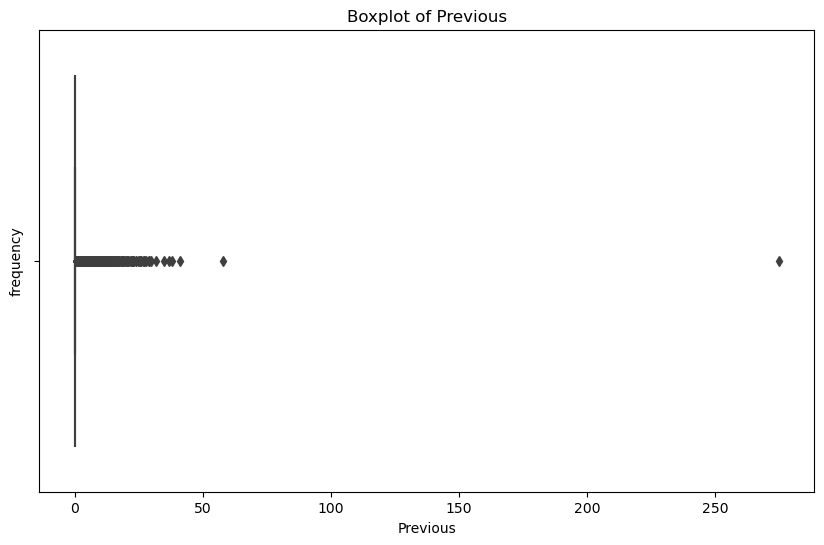

In [94]:
plt.figure(figsize=(10,6))
sns.boxplot(x='previous',data=num_df)
plt.title('Boxplot of Previous')
plt.xlabel('Previous')
plt.ylabel('frequency')
plt.show()

### Removing the Outliers

In [95]:
from scipy import stats
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [96]:
z_scores = stats.zscore(df[numerical_cols])

In [97]:
threshold = 3

In [98]:
outliers = (abs(z_scores) > threshold).any(axis=1)

In [99]:
df_new = df[~outliers]

In [100]:
df_new

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,management,single,secondary,no,2968,no,no,unknown,20,jun,30,4,-1,0,unknown,no
31641,9476,37,technician,single,tertiary,no,1309,no,no,unknown,6,jun,442,2,-1,0,unknown,no
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes


In [101]:
df_new.shape

(28124, 18)

In [102]:
df.shape

(31647, 18)

We removed 3523 rows from the data set as outliers

### Checking Skewness


In [103]:
df.skew()

ID           0.005851
age          0.681607
balance      7.995696
day          0.087185
duration     3.199766
campaign     4.873935
pdays        2.642374
previous    49.302348
dtype: float64

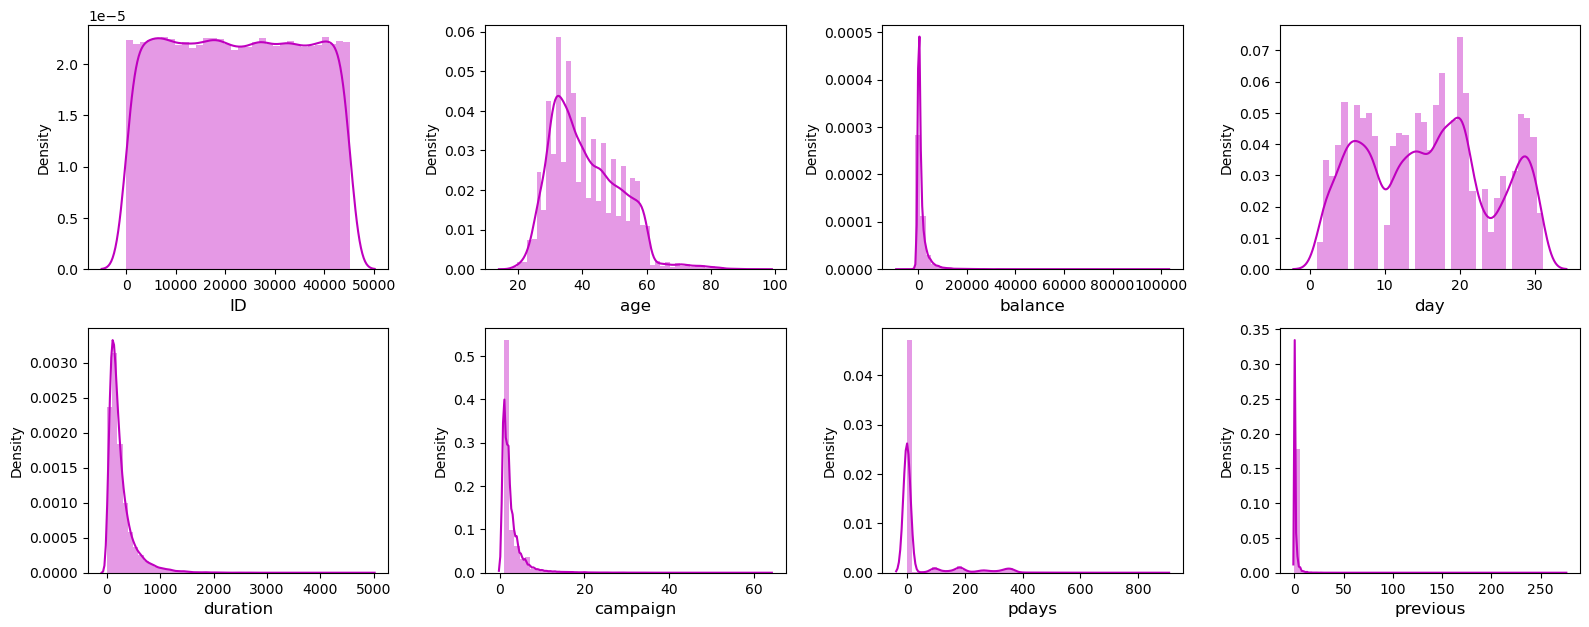

In [104]:
plt.figure(figsize=(16,12))
plotnumber=1
for i in num_df:
    if plotnumber<=8:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[i],color='m')
        plt.xlabel(i,fontsize=12)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

<AxesSubplot:xlabel='age', ylabel='Density'>

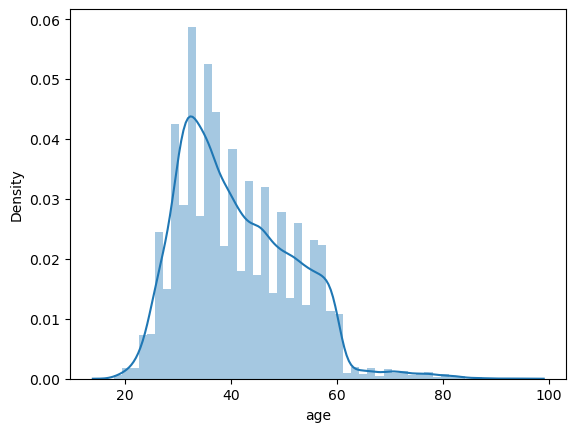

In [105]:
sns.distplot(df['age'])

<AxesSubplot:xlabel='balance', ylabel='Density'>

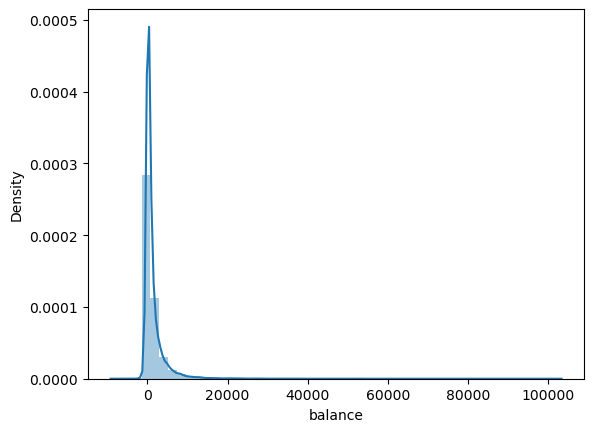

In [106]:
sns.distplot(df['balance'])

<AxesSubplot:xlabel='day', ylabel='Density'>

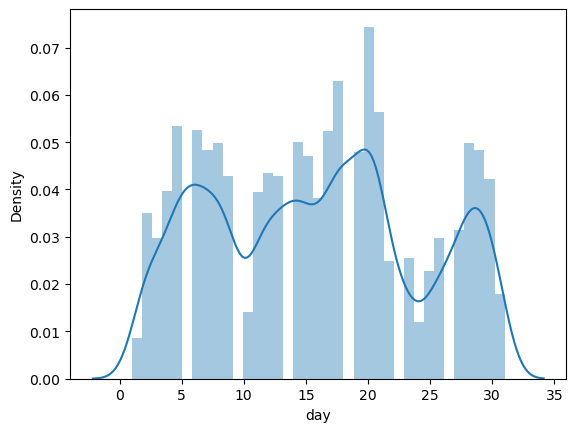

In [107]:
sns.distplot(df['day'])

<AxesSubplot:xlabel='duration', ylabel='Density'>

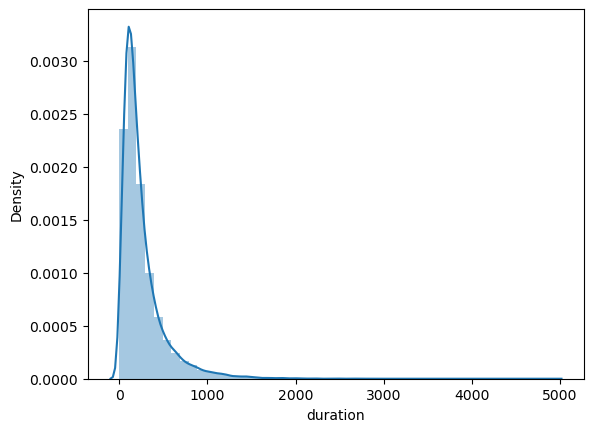

In [108]:
sns.distplot(df['duration'])

<AxesSubplot:xlabel='campaign', ylabel='Density'>

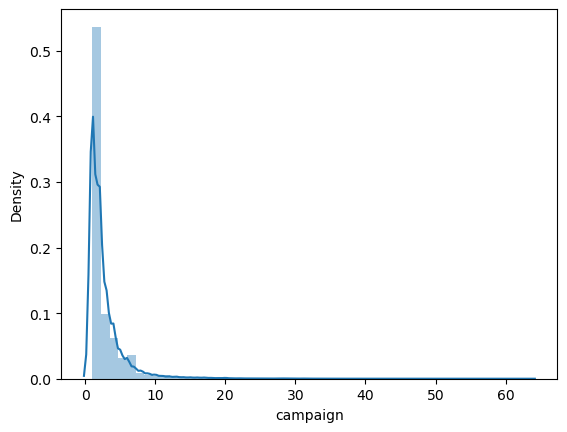

In [109]:
sns.distplot(df['campaign'])

<AxesSubplot:xlabel='pdays', ylabel='Density'>

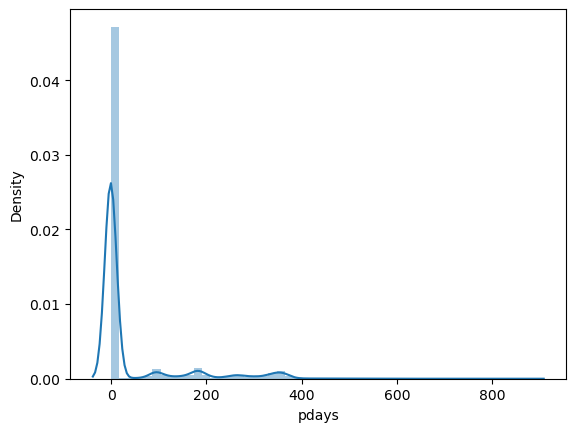

In [110]:
sns.distplot(df['pdays'])

<AxesSubplot:xlabel='previous', ylabel='Density'>

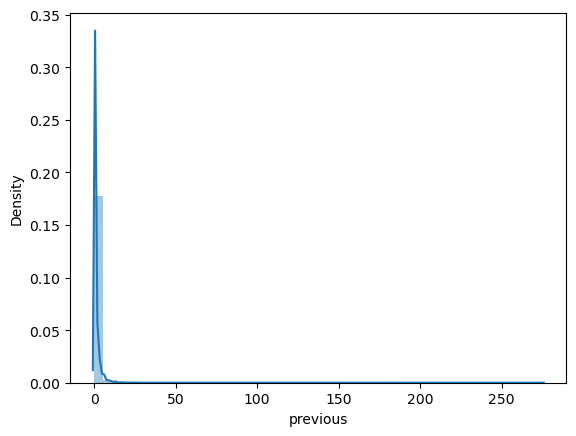

In [111]:
sns.distplot(df['previous'])

Here in the above analysis we have checked the presence of skewness in the original data set which has outliers present in it.

### Removing Skewness from new dataset

Now we will check the dataset with no outliers

In [112]:
df_new

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,management,single,secondary,no,2968,no,no,unknown,20,jun,30,4,-1,0,unknown,no
31641,9476,37,technician,single,tertiary,no,1309,no,no,unknown,6,jun,442,2,-1,0,unknown,no
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes


In [113]:
df_new.skew()

ID          0.079376
age         0.438496
balance     2.437605
day         0.073752
duration    1.596552
campaign    2.059359
pdays       2.824483
previous    3.691573
dtype: float64

In [114]:
#lets find the best method for skewness
from scipy.stats import skew, boxcox
def skee(a):
    model=[np.sqrt(a),np.log(a),stats.boxcox(a)[0]]
    print('original skewness is:',a.skew())
    print('\n')
    for m in model:
        df_new=m
        print(skew(m))
        print('\n')

In [115]:
skee(df_new['campaign'])

original skewness is: 2.059358773735348


1.2321443245771488


0.5968984378595045


0.147694825925805




In [116]:
df_new['campaign']=stats.boxcox(df_new['campaign'])[0]

In [117]:
print(skew(df_new['campaign']))

0.147694825925805


In [118]:
pdays_pos = df_new['pdays'][df_new['pdays'] > 0]
pdays_boxcox, _ = stats.boxcox(pdays_pos)


In [119]:
df_new['pdays_boxcox'] = np.nan
df_new.loc[df_new['pdays'] > 0, 'pdays_boxcox'] = pdays_boxcox

In [120]:
df_new['pdays'] = df_new['pdays_boxcox']
df_new.drop('pdays_boxcox', axis=1, inplace=True)

In [121]:
print(df_new['pdays'].skew())

-0.12609146646780767


In [122]:
df_new.skew()

ID          0.079376
age         0.438496
balance     2.437605
day         0.073752
duration    1.596552
campaign    0.147703
pdays      -0.126091
previous    3.691573
dtype: float64

In [123]:
pos_bal=df_new['balance'][df_new['balance']>0]
bal_boxcox,_=stats.boxcox(pos_bal)

In [124]:
df_new['bal_boxcox']=np.nan
df_new.loc[df_new['balance']>0,'bal_boxcox']=bal_boxcox

In [125]:
df_new['balance']=df_new['bal_boxcox']
df_new.drop('bal_boxcox',axis=1,inplace=True)
print(df_new['balance'].skew())

-0.026034755954954008


In [126]:
dur=df_new['duration'][df_new['duration']>0]
dur_boxcox,_=stats.boxcox(dur)

In [127]:
df_new['dur_boxcox']=np.nan
df_new.loc[df_new['duration']>0,'dur_boxcox']=dur_boxcox

In [128]:
df_new['duration']=df_new['dur_boxcox']
df_new.drop('dur_boxcox',axis=1,inplace=True)
print(df_new['duration'].skew())

0.005318890243725432


In [129]:
df_new.skew()

ID          0.079376
age         0.438496
balance    -0.026035
day         0.073752
duration    0.005319
campaign    0.147703
pdays      -0.126091
previous    3.691573
dtype: float64

In [130]:
mean = df_new['previous'].mean()
df_new['previous'].fillna(mean, inplace=True)

In [131]:
df_new.skew()

ID          0.079376
age         0.438496
balance    -0.026035
day         0.073752
duration    0.005319
campaign    0.147703
pdays      -0.126091
previous    3.691573
dtype: float64

So finally after removing the skewness the dataset looks preety decent

### Handling missing values

In [134]:
print(df_new.isna().sum())

ID                0
age               0
job               0
marital           0
education         0
default           0
balance        4660
housing           0
loan              0
contact           0
day               0
month             0
duration          1
campaign          0
pdays         24197
previous          0
poutcome          0
subscribed        0
dtype: int64


So we came accross some nan values and we can see balnce and pdays contain nan values.

In [137]:
df_new.fillna(df_new.mean(), inplace=True)

This nan values can be replaced with fillna() method.

In [138]:
print(df_new.isna().sum())

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


In [139]:
# Numerical columns
num_cols = df_new.select_dtypes(include=['int64']).columns
num = df_new[num_cols]

# Categorical columns
cat_cols = df_new.select_dtypes(include=['object']).columns
cat= df_new[cat_cols]

### Data Preprocessing

converting categorical columns to numerical columns

In [169]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [170]:
for col in df_new.columns:
    if df_new[col].dtype == 'object':
        df_new[col] = le.fit_transform(df_new[col])

In [171]:
df_new.dtypes

ID              int64
age             int64
job             int32
marital         int32
education       int32
default         int32
balance       float64
housing         int32
loan            int32
contact         int32
day             int64
month           int32
duration      float64
campaign      float64
pdays         float64
previous        int64
poutcome        int32
subscribed      int32
dtype: object

All of our data types has been converted to float64 or int32 datatype. so now we can proceed with trainng of dataset

### Separating x and y data¶

In [172]:
df_new

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,1,3,0,15.954326,0,0,1,19,9,5.776891,0.581076,77.816966,0,3,0
1,40576,31,11,1,1,0,1.213095,0,0,0,20,5,7.513146,0.581076,77.816966,0,3,0
2,15320,27,7,1,1,0,13.180779,1,0,0,18,5,10.283621,0.000000,77.816966,0,3,0
3,43962,57,4,0,2,0,18.088309,0,0,0,22,6,14.937641,0.000000,42.247534,3,2,1
4,29842,31,9,1,1,0,7.526330,1,0,0,4,3,11.806709,0.000000,77.816966,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,4,2,1,0,17.662194,0,0,2,20,6,4.962907,0.984968,77.816966,0,3,0
31641,9476,37,9,2,2,0,14.510705,0,0,2,6,6,12.340598,0.581076,77.816966,0,3,0
31642,36483,29,4,2,2,0,12.175024,1,0,0,12,8,8.154630,0.581076,77.816966,0,3,0
31643,40178,53,4,0,2,0,10.538978,0,1,0,5,6,12.308004,0.581076,77.816966,0,3,1


In [173]:
x=df_new.iloc[:,:-1]
x

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,0,1,3,0,15.954326,0,0,1,19,9,5.776891,0.581076,77.816966,0,3
1,40576,31,11,1,1,0,1.213095,0,0,0,20,5,7.513146,0.581076,77.816966,0,3
2,15320,27,7,1,1,0,13.180779,1,0,0,18,5,10.283621,0.000000,77.816966,0,3
3,43962,57,4,0,2,0,18.088309,0,0,0,22,6,14.937641,0.000000,42.247534,3,2
4,29842,31,9,1,1,0,7.526330,1,0,0,4,3,11.806709,0.000000,77.816966,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,4,2,1,0,17.662194,0,0,2,20,6,4.962907,0.984968,77.816966,0,3
31641,9476,37,9,2,2,0,14.510705,0,0,2,6,6,12.340598,0.581076,77.816966,0,3
31642,36483,29,4,2,2,0,12.175024,1,0,0,12,8,8.154630,0.581076,77.816966,0,3
31643,40178,53,4,0,2,0,10.538978,0,1,0,5,6,12.308004,0.581076,77.816966,0,3


In [174]:
y=df_new.iloc[:,-1:]
y

,subscribed
0,0
1,0
2,0
3,1
4,0
...,...
31640,0
31641,0
31642,0
31643,1


In [175]:
y.dtypes

subscribed    int32
dtype: object

Here upon checking the datatype of our terget variable we find that even after having numerical values in it the datatype is object
so we will convert it to float64 type

In [176]:
df_new['subscribed'] = df_new['subscribed'].astype('float64')

### Train_test_split

In [177]:
# splitting the data into 76% training and 24% testing
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=43)

In [178]:
x_train.shape

(22499, 17)

In [179]:
x_test.shape

(5625, 17)

In [180]:
y_train.shape

(22499, 1)

In [181]:
y_test.shape

(5625, 1)

In [182]:
y_test.dtypes

subscribed    int32
dtype: object

## Using sampling techniques for class imbalance

In [186]:
#Actually there is no significance class imbalance in this scenario
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

In [187]:
sm = SMOTE()

In [189]:
x_resampled, y_resampled = sm.fit_resample(x, y)

In [194]:
x_smote,y_smote=sm.fit_resample(x,y)

In [190]:
#Accuracy through x_over,y_over models
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=42)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.819
classification report is
              precision    recall  f1-score   support

           0       0.84      0.79      0.81      7603
           1       0.80      0.85      0.82      7556

    accuracy                           0.82     15159
   macro avg       0.82      0.82      0.82     15159
weighted avg       0.82      0.82      0.82     15159

confusion matrix is
[[5988 1615]
 [1122 6434]]




In [195]:
#Accuracy through x_smote,y_smote models
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.3,random_state=42)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.822
classification report is
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      7603
           1       0.80      0.86      0.83      7556

    accuracy                           0.82     15159
   macro avg       0.82      0.82      0.82     15159
weighted avg       0.82      0.82      0.82     15159

confusion matrix is
[[5981 1622]
 [1081 6475]]




Observations:

1.Both x_over,y_over and x_smote,y_smote are rejected because of poor confusion matrix.

### Applying the Standard Scaling

In [196]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [197]:
#Checking accuracy after applying the scaling
lg=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.914
classification report is
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7616
           1       0.60      0.36      0.45       822

    accuracy                           0.91      8438
   macro avg       0.77      0.67      0.70      8438
weighted avg       0.90      0.91      0.90      8438

confusion matrix is
[[7419  197]
 [ 528  294]]




Observations:

1.There is an improvement in accuracy score,f1 score and confusion matrix after applying thescaling techniques.

### Building the model

In [206]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
add=AdaBoostClassifier()
rf=RandomForestClassifier()

In [207]:
#Finding the best random state
#Finding the maximum accuracy
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    mod=lg
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.919056648494904 on random state 34


In [208]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=81)

In [209]:
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.911
classification report is
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7572
           1       0.62      0.34      0.44       866

    accuracy                           0.91      8438
   macro avg       0.77      0.66      0.70      8438
weighted avg       0.90      0.91      0.90      8438

confusion matrix is
[[7386  186]
 [ 568  298]]




In [210]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred=gnb.predict(x_test)
print('accuracy score through GaussianNB is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through GaussianNB is 
0.847
classification report is
              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7572
           1       0.33      0.47      0.38       866

    accuracy                           0.85      8438
   macro avg       0.63      0.68      0.65      8438
weighted avg       0.87      0.85      0.86      8438

confusion matrix is
[[6742  830]
 [ 462  404]]




In [211]:
from sklearn.naive_bayes import BernoulliNB

In [212]:
bnb=BernoulliNB(alpha=0.85)
bnb.fit(x_train,y_train)
pred=bnb.predict(x_test)
print('accuracy score through GaussianNB is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through GaussianNB is 
0.857
classification report is
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      7572
           1       0.32      0.34      0.33       866

    accuracy                           0.86      8438
   macro avg       0.62      0.63      0.62      8438
weighted avg       0.86      0.86      0.86      8438

confusion matrix is
[[6936  636]
 [ 570  296]]




In [213]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('accuracy score through svc is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through svc is 
0.912
classification report is
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7572
           1       0.70      0.26      0.37       866

    accuracy                           0.91      8438
   macro avg       0.81      0.62      0.66      8438
weighted avg       0.90      0.91      0.89      8438

confusion matrix is
[[7477   95]
 [ 645  221]]




In [215]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred=dtc.predict(x_test)
print('accuracy score through Decisiob Tree Classifier is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Decisiob Tree Classifier is 
0.899
classification report is
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7572
           1       0.51      0.52      0.51       866

    accuracy                           0.90      8438
   macro avg       0.73      0.73      0.73      8438
weighted avg       0.90      0.90      0.90      8438

confusion matrix is
[[7142  430]
 [ 420  446]]




In [216]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('accuracy score through knn is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through knn is 
0.904
classification report is
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7572
           1       0.57      0.26      0.36       866

    accuracy                           0.90      8438
   macro avg       0.74      0.62      0.65      8438
weighted avg       0.88      0.90      0.89      8438

confusion matrix is
[[7396  176]
 [ 637  229]]




In [217]:
add.fit(x_train,y_train)
pred=add.predict(x_test)
print('accuracy score through Adaboost is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through Adaboost is 
0.911
classification report is
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7572
           1       0.62      0.33      0.43       866

    accuracy                           0.91      8438
   macro avg       0.77      0.65      0.69      8438
weighted avg       0.90      0.91      0.90      8438

confusion matrix is
[[7396  176]
 [ 579  287]]




In [218]:
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('accuracy score through random forest is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through random forest is 
0.92
classification report is
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7572
           1       0.66      0.47      0.55       866

    accuracy                           0.92      8438
   macro avg       0.80      0.72      0.75      8438
weighted avg       0.91      0.92      0.91      8438

confusion matrix is
[[7362  210]
 [ 461  405]]




### Cross validation score

In [219]:
models=[lg,gnb,bnb,svc,dtc,knn,add,rf]
for m in models:
    score=cross_val_score(m,x_scaled,y,cv=5)
    print(m,'score is:')
    print(round((score.mean()),3))
    print('\n')

LogisticRegression() score is:
0.913


GaussianNB() score is:
0.853


BernoulliNB(alpha=0.85) score is:
0.861


SVC() score is:
0.913


DecisionTreeClassifier() score is:
0.897


KNeighborsClassifier() score is:
0.903


AdaBoostClassifier() score is:
0.913


RandomForestClassifier() score is:
0.921




Observations:

If we observe the difference between the cross val score and accuracy then gaussianNB is th best model, but it has got poor confusion matrix so i am choosing Random forest

### Hyper parameter tuning

In [220]:
grid_param={
    'n_estimators':[10,50,100],
    'criterion':['gini','entropy'],
    'max_features':['auto','sqrt','log2'],
    'bootstrap':[True,False],
    'oob_score':[True,False],
    'class_weight':['balanced_subsample','balanced']
    
}

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x_scaled,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100, 'oob_score': True}
0.9208505642484589


In [221]:
rf1=RandomForestClassifier(n_estimators=100,criterion='entropy',max_features='sqrt',bootstrap=True,oob_score=False,class_weight='balanced')
rf1.fit(x_train,y_train)
pred=rf1.predict(x_test)
print('accuracy score through random forest is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through random forest is 
0.918
classification report is
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7572
           1       0.66      0.41      0.51       866

    accuracy                           0.92      8438
   macro avg       0.80      0.69      0.73      8438
weighted avg       0.91      0.92      0.91      8438

confusion matrix is
[[7388  184]
 [ 510  356]]




Observations:

1.The maximum accuracy we got with least overfitting, with high f1 score is 0.918

### Testing on test dataset

In [229]:
df_test=pd.read_csv('termdeposite_test.csv')
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [231]:
df_test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

### Converting categorical columns to numerical columns

In [233]:
for col in df_test.columns:
    if df_test[col].dtype == 'object':
        df_test[col] = le.fit_transform(df_test[col])

In [234]:
df_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,28292,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,45163,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


In [235]:
df_test.dtypes

ID           int64
age          int64
job          int32
marital      int32
education    int32
default      int32
balance      int64
housing      int32
loan         int32
contact      int32
day          int64
month        int32
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int32
dtype: object

In [237]:
pred_res=rf1.predict(df_test)
pred_res

array([0, 0, 0, ..., 0, 0, 0])

### Saving the data frame

In [238]:
df_pred=pd.DataFrame(pred_res)
df_pred.to_csv('test_prediction.csv')

## AUC ROC CURVE

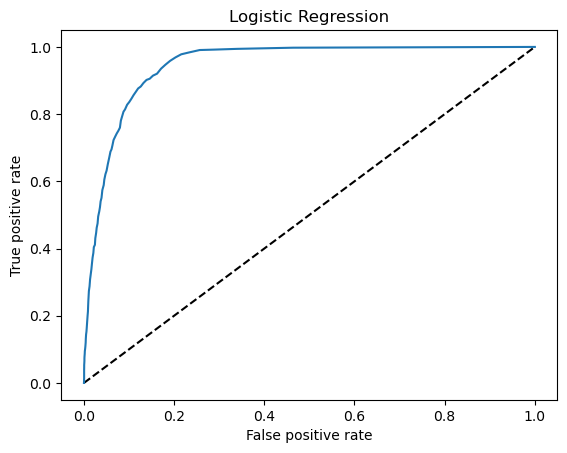

0.6933926987601092

In [239]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=rf1.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()
auc_score=roc_auc_score(y_test,rf1.predict(x_test))
auc_score

Observations:

1.The auc_roc score for this particular model is 0.6933, suggesting that model is going to perform better

### Saving the model

In [226]:
import joblib
joblib.dump(rf1,'bankmarketing.obj')

['bankmarketing.obj']